In [13]:
import sys
import numpy as np
import pickle
import statistics
from sklearn import model_selection, svm, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import joblib 
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [2]:
# Load MNIST Data
print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')
print('\nLoaded MNIST Data...')


Loading MNIST Data...

Loaded MNIST Data...


In [3]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)
print('\nLoaded Training Data...')


Loading Training Data...

Loaded Training Data...


In [4]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)
print('\nLoaded Testing Data...')


Loading Testing Data...

Loaded Testing Data...


In [5]:
def svmClassifier(train_img, train_labels, test_img, test_labels):
    #Features
    X = train_img
    #Labels
    Y = train_labels
    #Fitting on Training Data
    svmClassifier = svm.SVC(gamma=0.1, kernel='poly')
    svmClassifier.fit(X, Y)
    #Predicting on Testing Data
    test_labels_pred = svmClassifier.predict(test_img)
    #Calculating accuracy
    acc = accuracy_score(test_labels, test_labels_pred)
    #Calculating confusion matrix
    conf_mat = confusion_matrix(test_labels, test_labels_pred)
    # Save the model as a pickle in a file 
    joblib.dump(svmClassifier, 'svmClassifier.pickle') 
    print('Accuracy is \n', acc)
    print('Confusion Matrix is \n', conf_mat)

In [6]:
def knnClassifier(train_img, train_labels, test_img, test_labels):
    #Features
    X = train_img
    #Labels
    Y = train_labels
    #Fitting on Training Data
    knnClassifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
    knnClassifier.fit(X, Y)
    #Predicting on Testing Data
    test_labels_pred = knnClassifier.predict(test_img)
    #Calculating accuracy
    acc = accuracy_score(test_labels, test_labels_pred)
    #Calculating confusion matrix
    conf_mat = confusion_matrix(test_labels, test_labels_pred)
    # Save the model as a pickle in a file 
    joblib.dump(knnClassifier, 'knnClassifier.pickle') 
    print('Accuracy is \n', acc)
    print('Confusion Matrix is \n', conf_mat)

In [7]:
def rfcClassifier(train_img, train_labels, test_img, test_labels):
    #Features
    X = train_img
    #Labels
    Y = train_labels
    #Fitting on Training Data
    rfcClassifier = RandomForestClassifier(n_estimators=100, n_jobs=10)
    rfcClassifier.fit(X, Y)
    #Predicting on Testing Data
    test_labels_pred = rfcClassifier.predict(test_img)
    #Calculating accuracy
    acc = accuracy_score(test_labels, test_labels_pred)
    #Calculating confusion matrix
    conf_mat = confusion_matrix(test_labels, test_labels_pred)
    # Save the model as a pickle in a file 
    joblib.dump(rfcClassifier, 'rfcClassifier.pickle') 
    print('Accuracy is \n', acc)
    print('Confusion Matrix is \n', conf_mat)

In [8]:
svmClassifier(train_img, train_labels, test_img, test_labels)

Accuracy is 
 0.9787
Confusion Matrix is 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    1    0    9]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0   10    9    2    1    0    0 1000    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   3    6    1    5    9    3    1    1    3  977]]


In [9]:
knnClassifier(train_img, train_labels, test_img, test_labels)

Accuracy is 
 0.9688
Confusion Matrix is 
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [10]:
rfcClassifier(train_img, train_labels, test_img, test_labels)

Accuracy is 
 0.9699
Confusion Matrix is 
 [[ 969    0    1    0    0    3    4    1    2    0]
 [   0 1124    3    2    0    2    2    1    1    0]
 [   6    0  997    7    4    0    3    9    6    0]
 [   1    0    9  973    0    6    0    9    9    3]
 [   1    0    1    0  954    0    5    0    2   19]
 [   2    0    1   10    2  861    5    2    5    4]
 [   5    3    1    0    4    4  939    0    2    0]
 [   1    3   21    0    0    0    0  991    1   11]
 [   4    0    6    7    4    7    3    4  930    9]
 [   5    5    3    9   14    4    1    2    5  961]]


In [6]:
#Testing Image Classification Output

In [7]:
svmClassifier = joblib.load('svmClassifier.pickle')
knnClassifier = joblib.load('knnClassifier.pickle')
rfcClassifier = joblib.load('rfcClassifier.pickle')

In [28]:
randPerm = np.random.randint(50,test_img.shape[0],8)

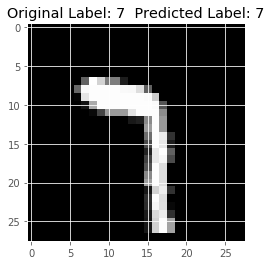

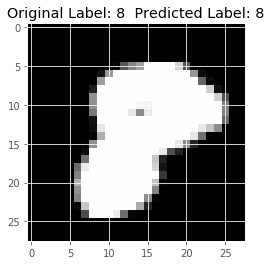

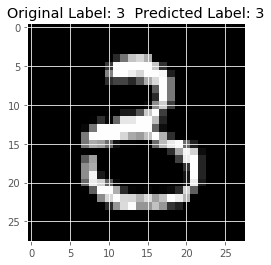

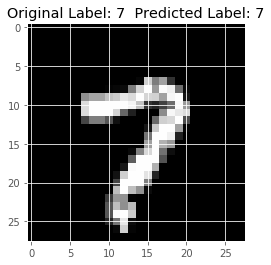

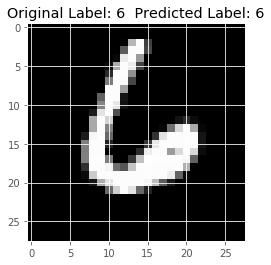

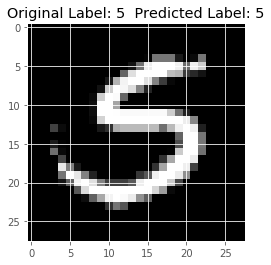

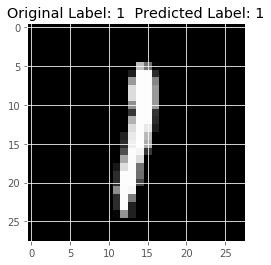

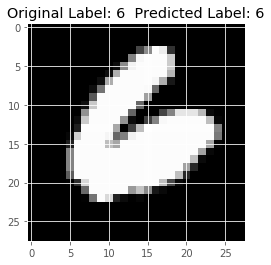

In [29]:
for index in randPerm:
    prediction = []
    testImage = test_img[index].reshape(1, -1)
    prediction.append(svmClassifier.predict(testImage)[0])
    prediction.append(knnClassifier.predict(testImage)[0])
    prediction.append(rfcClassifier.predict(testImage)[0])
    try:
        predictedLabel = mode(prediction)
    except statistics.StatisticsError:
        predictedLabel = prediction[0]
    #Output image
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[index], predictedLabel))
    plt.imshow(testImage.reshape(28,28), cmap = 'gray')
    plt.show()